You are given a 2D array points of size n x 2 representing integer coordinates of some points on a 2D-plane, where points[i] = [xi, yi].

We define the right direction as positive x-axis (increasing x-coordinate) and the left direction as negative x-axis (decreasing x-coordinate). Similarly, we define the up direction as positive y-axis (increasing y-coordinate) and the down direction as negative y-axis (decreasing y-coordinate)

You have to place n people, including Alice and Bob, at these points such that there is exactly one person at every point. Alice wants to be alone with Bob, so Alice will build a rectangular fence with Alice's position as the upper left corner and Bob's position as the lower right corner of the fence (Note that the fence might not enclose any area, i.e. it can be a line). If any person other than Alice and Bob is either inside the fence or on the fence, Alice will be sad.

Return the number of pairs of points where you can place Alice and Bob, such that Alice does not become sad on building the fence.

Note that Alice can only build a fence with Alice's position as the upper left corner, and Bob's position as the lower right corner. For example, Alice cannot build either of the fences in the picture below with four corners (1, 1), (1, 3), (3, 1), and (3, 3), because:

    With Alice at (3, 3) and Bob at (1, 1), Alice's position is not the upper left corner and Bob's position is not the lower right corner of the fence.
    With Alice at (1, 3) and Bob at (1, 1), Bob's position is not the lower right corner of the fence.

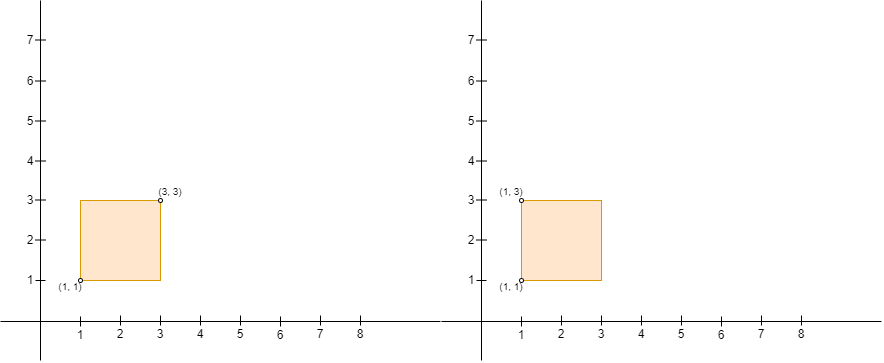

Example 1:

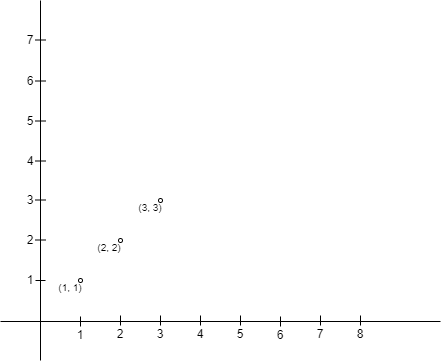

Input: points = [[1,1],[2,2],[3,3]]
Output: 0
Explanation: There is no way to place Alice and Bob such that Alice can build a fence with Alice's position as the upper left corner and Bob's position as the lower right corner. Hence we return 0. 

Example 2:

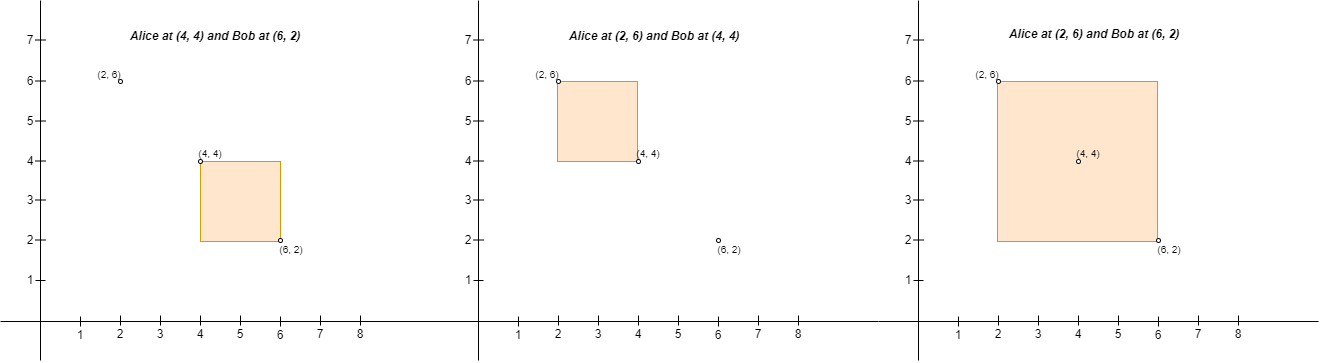

Input: points = [[6,2],[4,4],[2,6]]
Output: 2
Explanation: There are two ways to place Alice and Bob such that Alice will not be sad:
- Place Alice at (4, 4) and Bob at (6, 2).
- Place Alice at (2, 6) and Bob at (4, 4).
You cannot place Alice at (2, 6) and Bob at (6, 2) because the person at (4, 4) will be inside the fence.

Example 3:

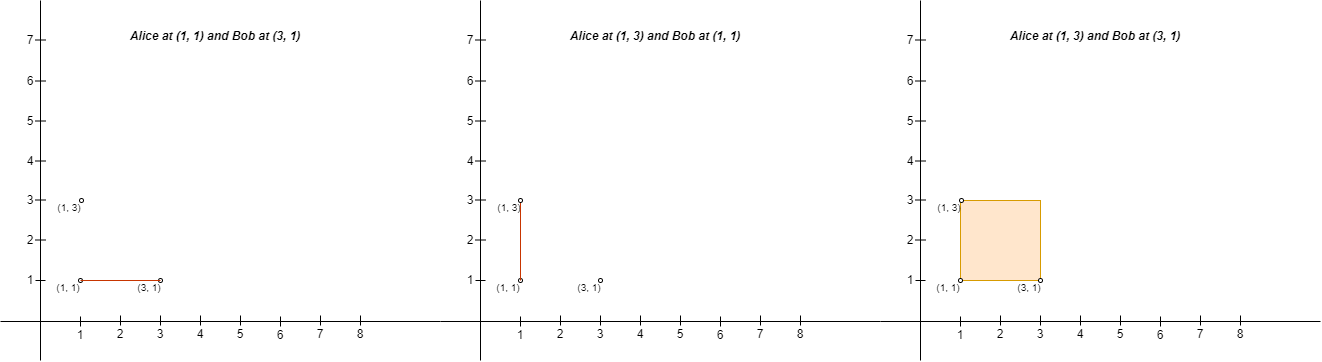

Input: points = [[3,1],[1,3],[1,1]]
Output: 2
Explanation: There are two ways to place Alice and Bob such that Alice will not be sad:
- Place Alice at (1, 1) and Bob at (3, 1).
- Place Alice at (1, 3) and Bob at (1, 1).
You cannot place Alice at (1, 3) and Bob at (3, 1) because the person at (1, 1) will be on the fence.
Note that it does not matter if the fence encloses any area, the first and second fences in the image are valid.

 

Constraints:

    2 <= n <= 1000
    points[i].length == 2
    -109 <= points[i][0], points[i][1] <= 109
    All points[i] are distinct.

 

In [ ]:
class Solution:
    def numberOfPairs(self, points: List[List[int]]) -> int:
        points = sorted(points, key=lambda x: (x[0], -x[1]))
        n = len(points)
        ans = 0
        for i in range(n - 1):
            for j in range(i + 1, n):
                x1, y1 = points[i]
                x2, y2 = points[j]
                if y1 >= y2:
                    for k in range(i + 1, j):
                        xt, yt = points[k]
                        if x1 <= xt <= x2 and y1 >= yt >= y2:
                            break
                    else:
                        ans += 1
        return ans

In [ ]:
class Solution:
    def numberOfPairs(self, points: List[List[int]]) -> int:
        ans = 0
        points.sort(key=lambda x: (x[0], -x[1]))

        for i in range(len(points) - 1):
            pointA = points[i]
            xMin = pointA[0] - 1
            xMax = math.inf
            yMin = -math.inf
            yMax = pointA[1] + 1

            for j in range(i + 1, len(points)):
                pointB = points[j]
                if (
                    pointB[0] > xMin
                    and pointB[0] < xMax
                    and pointB[1] > yMin
                    and pointB[1] < yMax
                ):
                    ans += 1
                    xMin = pointB[0]
                    yMin = pointB[1]

        return ans